# Extract Resonances And Change Bin Specs Accordingly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath_in = '/fp/projects01/ec332/data/spectrograms/stationary_resonances_detected_window60s_overlap0.0_prom10db_rbw3.0_freq0to200hz_count9_frac-3.0_prom0.5.csv'

In [3]:
df

NameError: name 'df' is not defined

In [4]:
counts = df['count']

NameError: name 'df' is not defined

In [5]:
plt.hist(counts,bins = 40)

NameError: name 'counts' is not defined

In [6]:
df = pd.read_csv(filepath_in)
stationary_resonances = df['frequency'][df['count'] >= 10]
stationary_resonances = stationary_resonances.round(0)

In [7]:
len(list(stationary_resonances.values))

100

In [8]:
len(set(list(stationary_resonances.values)))

62

In [9]:
unique_resonances = list(set(list(stationary_resonances.values)))

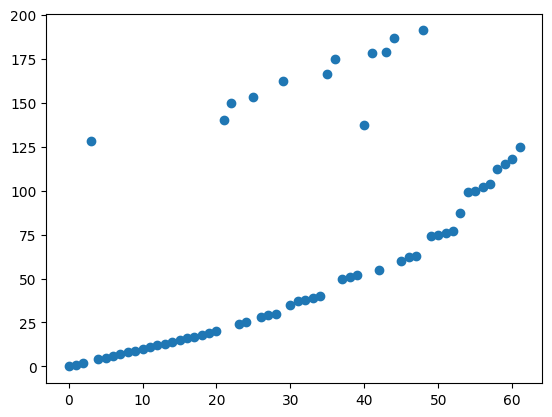

In [10]:
init = 0
increment = 62
first = init
last = init + increment
plt.scatter(range(first,last),list(set(list(stationary_resonances.values)))[first:last])


In [15]:
bin_specs_arr[0][199]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [12]:
window = 72
threshold = 345
bin_specs_arr = np.load(f'spectrograms/bin_spec_{window}_{threshold}.npz')['spectrograms']
bin_specs_no_res = []

In [16]:
for i, bin_spec in enumerate(bin_specs_arr):
    for resonance in unique_resonances:
        bin_spec[int(resonance)-1] = np.full(72,False)
    bin_specs_no_res.append(bin_spec)
bin_specs_no_res = np.array(bin_specs_no_res)

In [17]:
bin_specs_no_res.shape

(2410, 200, 72)

In [18]:
np.savez(f"spectrograms/bin_spec_no_res_{window}_{threshold}.npz", spectrograms=bin_specs_no_res)

# Alternate_method

In [17]:
import numpy as np

# Example list of 2D numpy arrays
list_of_arrays = [
    np.array([[True, False, True], [True, True, False], [False, False, False]]),
    np.array([[True, True, True], [False, True, False], [True, False, True]]),
    # Add more arrays as needed
]

# Function to modify rows in a 2D array
def modify_arrays(list_of_arrays):
    modified_arrays = []
    for array in list_of_arrays:
        modified_array = array.copy()  # Create a copy to avoid modifying the original array
        for i, row in enumerate(array):
            if np.sum(row) > (len(row) // 2):  # Check if more than half of the row is True
                modified_array[i] = 2  # Set the entire row to False if condition is met
        modified_arrays.append(modified_array)
    return modified_arrays

# Call the function to get the modified list
modified_list_of_arrays = modify_arrays(list_of_arrays)

# Print the modified arrays
for i, modified_array in enumerate(modified_list_of_arrays):
    print(f"Modified array {i + 1}:")
    print(modified_array)


Modified array 1:
[[ True  True  True]
 [ True  True  True]
 [False False False]]
Modified array 2:
[[ True  True  True]
 [False  True False]
 [ True  True  True]]


In [18]:
window = 72
threshold = 345
bin_specs_arr = np.load(f'spectrograms/bin_spec_{window}_{threshold}.npz')['spectrograms']

In [19]:
int_array = bin_specs_arr.astype(np.int32)

In [20]:
int_array_no_res = modify_arrays(list(int_array))

In [21]:
int_array_no_res = np.array(int_array_no_res)

In [ ]:
int_array_no_res

In [5]:
np.savez(f"spectrograms/bin_spec_red_res_{window}_{threshold}.npz", spectrograms=int_array_no_res)

In [37]:
start = 20
fin = start+10
int_array_no_res[30][start:fin]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
    